In [29]:
# from google.colab import drive
# drive.mount('/content/drive')

In [30]:
# physio_path = "/content/drive/MyDrive/Colab Notebooks/FYP/data/Exp4/Exp4/Preprocessed/Physio/periods/features_segm_1.csv"
# driving_path = "/content/drive/MyDrive/Colab Notebooks/FYP/data/Exp4/Exp4/Preprocessed/Driving/features_tor_10s_30s_rows.csv"
# pvt_path = "/content/drive/MyDrive/Colab Notebooks/FYP/data/Exp4/Exp4/Preprocessed/PVT/data_PVT_no_outliers_mean_sd.csv"

In [31]:
physio_path = "../Exp4/Preprocessed/Physio/periods/features_segm_1.csv"
driving_path = "../Exp4/Preprocessed/Driving/features_tor_10s_30s_rows.csv"
pvt_path = "../Exp4/Preprocessed/PVT/data_PVT_no_outliers_mean_sd.csv"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

physio_data = pd.read_csv(physio_path)
driving_data = pd.read_csv(driving_path)
pvt_data = pd.read_csv(pvt_path)

columns_to_drop = ['label_sleep', 'label_first_scenario', 'label_time_exp', 'period']
driving_data = driving_data.drop(columns=columns_to_drop)

data = pd.merge(physio_data, pvt_data, on='subject_id', how='inner')
data = pd.merge(data, driving_data, on='subject_id', how='inner')

print(data.head())

   subject_id  label_sleep label_first_scenario  label_time_exp period  \
0           1            0                Rural              16  Rural   
1           1            0                Rural              16  Urban   
2           2            1                Urban              16  Urban   
3           2            1                Urban              16  Rural   
4           3            0                Rural              16  Rural   

   segment_id  EDA_filtered_mean_Bl  EDA_filtered_min_Bl  EDA_filtered_max_Bl  \
0           0              2.188997             1.648550             3.448137   
1           0              2.188997             1.648550             3.448137   
2           0             11.196484             9.901155            14.980536   
3           0             11.196484             9.901155            14.980536   
4           0             14.989715            10.716242            23.833487   

   EDA_filtered_std_Bl  ...  TO_Decision_Rural  TO_RT_Rural  TO_MaxS

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Columns: 426 entries, subject_id to TO_MaxBraking_Urban
dtypes: float64(415), int64(7), object(4)
memory usage: 386.2+ KB


In [34]:
data.head()

,subject_id,label_sleep,label_first_scenario,label_time_exp,period,segment_id,EDA_filtered_mean_Bl,EDA_filtered_min_Bl,EDA_filtered_max_Bl,EDA_filtered_std_Bl,...,TO_Decision_Rural,TO_RT_Rural,TO_MaxSWA_Rural,TO_ReengageTime_Rural,TO_MaxBraking_Rural,TO_Decision_Urban,TO_RT_Urban,TO_MaxSWA_Urban,TO_ReengageTime_Urban,TO_MaxBraking_Urban
0,1,0,Rural,16,Rural,0,2.188997,1.648550,3.448137,0.401299,...,1,2.450,5.0,12.399,100.0,1.0,1.484,1.0,9.900,100.0
1,1,0,Rural,16,Urban,0,2.188997,1.648550,3.448137,0.401299,...,1,2.450,5.0,12.399,100.0,1.0,1.484,1.0,9.900,100.0
2,2,1,Urban,16,Urban,0,11.196484,9.901155,14.980536,1.039038,...,4,2.900,2.0,3.233,0.0,NaN,NaN,NaN,NaN,NaN
3,2,1,Urban,16,Rural,0,11.196484,9.901155,14.980536,1.039038,...,4,2.900,2.0,3.233,0.0,NaN,NaN,NaN,NaN,NaN
4,3,0,Rural,16,Rural,0,14.989715,10.716242,23.833487,2.427384,...,1,2.233,7.0,25.767,100.0,1.0,2.918,5.0,14.068,95.2


In [35]:
label_counts = data["label_sleep"].value_counts()
print(label_counts)

label_sleep
1    62
0    54
Name: count, dtype: int64


C:\Users\kahch\AppData\Local\Temp\ipykernel_41892\3141730654.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


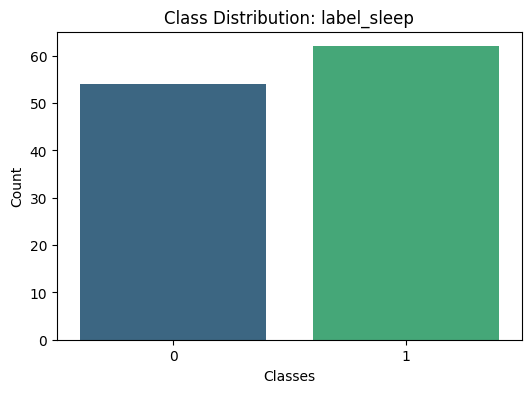

In [36]:
plt.figure(figsize=(6, 4))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.title("Class Distribution: label_sleep")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()


In [ ]:
columns_to_drop = ["sleep_condition", "code", "period", "first_scenario", "label_first_scenario", "label_time_exp", "segment_id"]
data = data.drop(columns=columns_to_drop, axis=1)

#Data Preprocessing

In [ ]:
columns_to_exclude = data.columns[data.isnull().mean() > 0.5]
data = data.drop(columns=columns_to_exclude)

data.replace([np.inf, -np.inf], np.nan, inplace=True)

numerical_data = data.select_dtypes(include=['number'])

missing_values = numerical_data.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

data.fillna(numerical_data.mean(), inplace=True)

missing_after = data.isnull().sum()
print("\nMissing Values After Filling:\n", missing_after[missing_after > 0])

if missing_after.sum() == 0:
    print("\nAll missing values have been successfully filled!")
else:
    print("\nThere are still missing values in the dataset.")

Missing Values:
 HRV_SDANN2_Bl                    44
HRV_SDNNI2_Bl                    44
RRV_SampEn_Bl                     2
HRV_SDANN2_Dr                     1
HRV_SDNNI2_Dr                     1
HRV_SDANN5_Dr                     4
HRV_SDNNI5_Dr                     4
HRV_VLF_Dr                        9
HRV_DFA_alpha1_ExpRange_Dr        3
HRV_DFA_alpha1_ExpMean_Dr         3
HRV_DFA_alpha1_DimRange_Dr        3
HRV_DFA_alpha1_DimMean_Dr         3
RRV_SampEn_Dr                     1
HRV_DFA_alpha1_DimMean_Dr-Bl      3
HRV_DFA_alpha1_DimRange_Dr-Bl     3
HRV_DFA_alpha1_ExpMean_Dr-Bl      3
HRV_DFA_alpha1_ExpRange_Dr-Bl     3
HRV_SDANN2_Dr-Bl                 45
HRV_SDNNI2_Dr-Bl                 45
RRV_DFA_alpha1_Dr-Bl              2
RRV_DFA_alpha1_DimMean_Dr-Bl      2
RRV_DFA_alpha1_DimRange_Dr-Bl     2
RRV_DFA_alpha1_ExpMean_Dr-Bl      2
RRV_DFA_alpha1_ExpRange_Dr-Bl     2
RRV_SampEn_Dr-Bl                  3
RRV_DFA_alpha1_Bl                 2
RRV_DFA_alpha1_ExpRange_Bl        2
RRV_DFA_alp

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data["label_sleep"] = label_encoder.fit_transform(data["label_sleep"])

print("Encoded Labels:\n", data["label_sleep"].unique())

Encoded Labels:
 [0 1]


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

X = data.drop(columns=['subject_id', 'label_sleep']).values
y = data['label_sleep'].values

encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print(f"Training Set Size: {x_train.shape}")
print(f"Testing Set Size: {x_test.shape}")

scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.transform(x_test)

Training Set Size: (92, 398)
Testing Set Size: (24, 398)


In [ ]:
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weights_dict = dict(enumerate(class_weights))

input_size = x_train_norm.shape[1]
output_size = y_train.shape[1]
embedding_dim = 32

input_layer = layers.Input(shape=(input_size,))

reshaped = layers.Reshape((input_size, 1))(input_layer)

projected = layers.Dense(embedding_dim)(reshaped)

transformer_block = layers.MultiHeadAttention(num_heads=4, key_dim=embedding_dim)(projected, projected)
transformer_block = layers.Dropout(0.1)(transformer_block)
transformer_block = layers.LayerNormalization(epsilon=1e-6)(transformer_block + projected)

flattened = layers.Flatten()(transformer_block)
dense_1 = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(flattened)
dropout_1 = layers.Dropout(0.5)(dense_1)
output = layers.Dense(output_size, activation='sigmoid')(dropout_1)

model = models.Model(inputs=input_layer, outputs=output)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    x_train_norm, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(x_test_norm, y_test),
    class_weight=class_weights_dict,
    callbacks=[early_stopping],
    verbose=1
)

val_loss, val_accuracy = model.evaluate(x_test_norm, y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

y_pred = model.predict(x_test_norm)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 192ms/step - accuracy: 0.5357 - loss: 3.8490 - val_accuracy: 0.5417 - val_loss: 4.2262
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.9066 - loss: 3.1681 - val_accuracy: 0.7083 - val_loss: 3.4795
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.9665 - loss: 2.9545 - val_accuracy: 0.7083 - val_loss: 3.6110
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.9494 - loss: 2.8827 - val_accuracy: 0.7083 - val_loss: 3.6103
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.9798 - loss: 2.5290 - val_accuracy: 0.7500 - val_loss: 3.6988
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.9603 - loss: 2.5454 - val_accuracy: 0.7500 - val_loss: 3.6223
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.9828 - loss: 2.4391 - val_accuracy: 0.7500 - val_loss: 3.4887
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.9946 - loss: 2.2961 - val_accuracy: 0.7500 - v

In [42]:
print("Classification Report:\n")
print(classification_report(y_true_classes, y_pred_classes))

accuracy = accuracy_score(y_true_classes, y_pred_classes)
if y_test.shape[1] == 2:
    roc_auc = roc_auc_score(y_true_classes, y_pred[:, 1])
else:
    roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovr', average='weighted')

precision = precision_score(y_true_classes, y_pred_classes, average='macro')
recall = recall_score(y_true_classes, y_pred_classes, average='macro')
f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.81      1.00      0.90        13

    accuracy                           0.88        24
   macro avg       0.91      0.86      0.87        24
weighted avg       0.90      0.88      0.87        24

Accuracy: 0.88
ROC-AUC Score: 0.97
Precision: 0.91
Recall: 0.86
F1-Score: 0.87


<Figure size 1000x800 with 0 Axes>

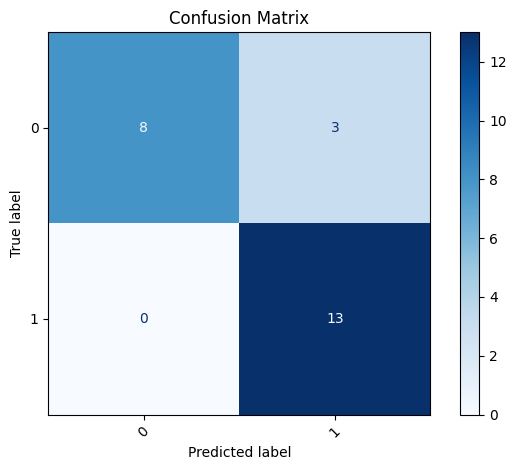

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
class_names = label_encoder.classes_
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

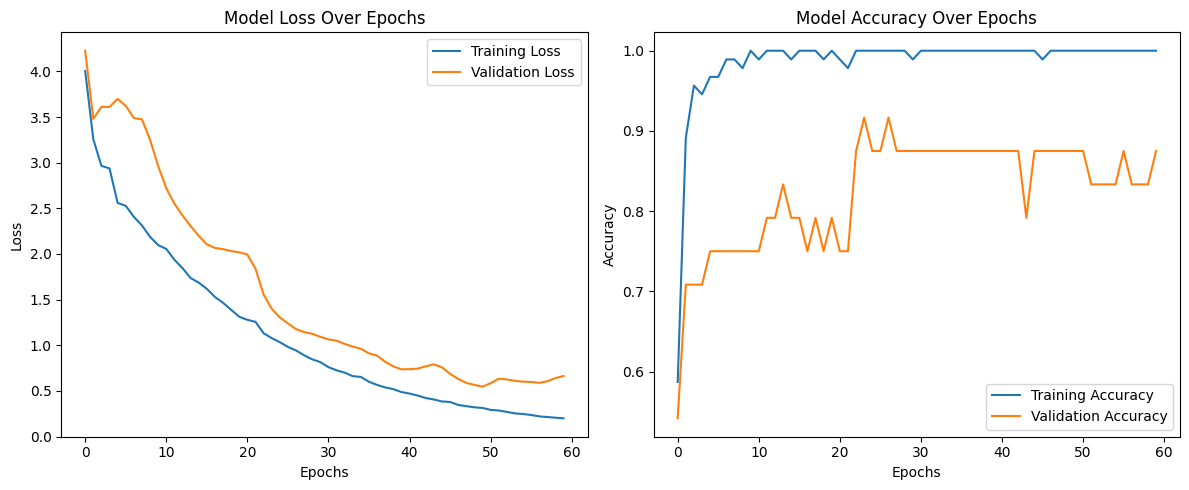

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

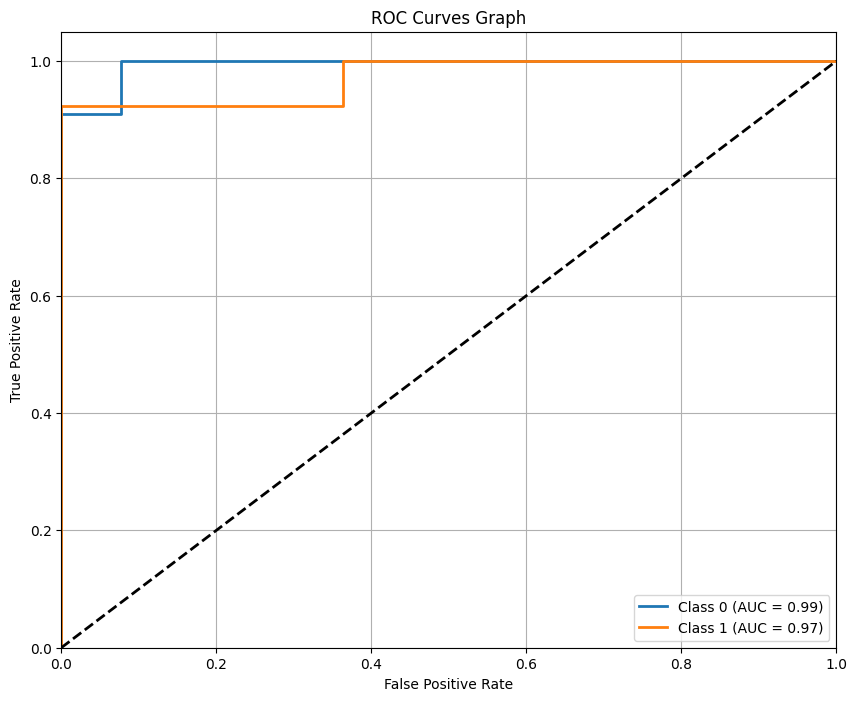

In [45]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc, average_precision_score

plt.figure(figsize=(10, 8))

n_classes = y_test.shape[1]

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, 
                label=f'Class {label_encoder.inverse_transform([i])[0]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Graph')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

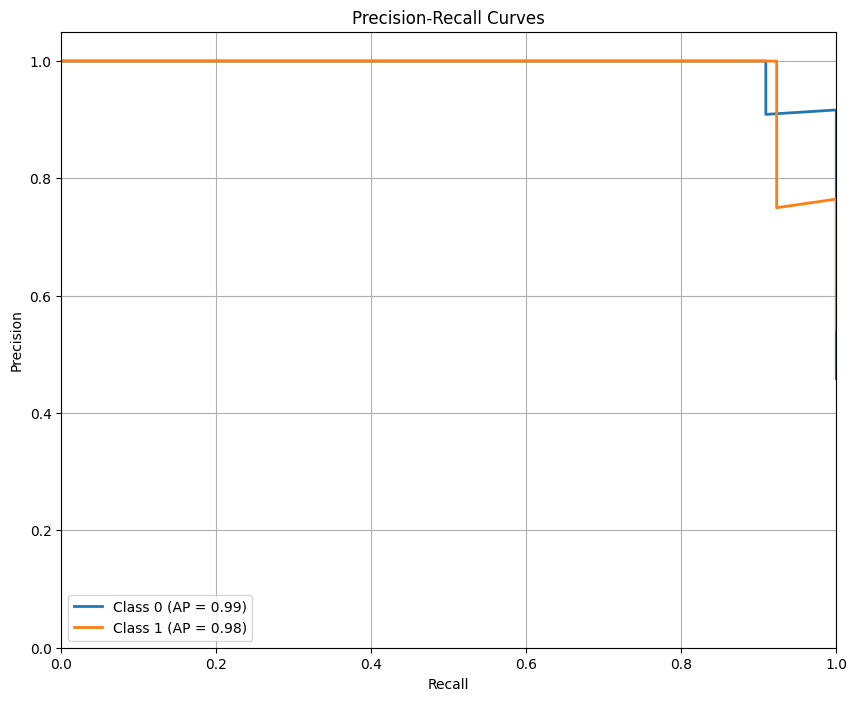

In [46]:
plt.figure(figsize=(10, 8))

n_classes = y_test.shape[1]

for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test[:, i], y_pred[:, i])
    avg_precision = average_precision_score(y_test[:, i], y_pred[:, i])
    plt.plot(recall, precision, lw=2,
                label=f'Class {label_encoder.inverse_transform([i])[0]} (AP = {avg_precision:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [47]:
!pip install keras-tuner

In [ ]:
import keras_tuner as kt

def build_tabtransformer_model(hp):
    input_size = x_train_norm.shape[1]
    output_size = y_train.shape[1]

    embedding_dim = hp.Choice('embedding_dim', values=[16, 32, 64])

    input_layer = layers.Input(shape=(input_size,))

    reshaped = layers.Reshape((input_size, 1))(input_layer)

    projected = layers.Dense(embedding_dim)(reshaped)

    transformer_block = layers.MultiHeadAttention(
        num_heads=hp.Choice('num_heads', values=[2, 4, 8]),
        key_dim=embedding_dim
    )(projected, projected)

    transformer_block = layers.Dropout(
        hp.Choice('dropout_1', values=[0.1, 0.2, 0.3])
    )(transformer_block)

    transformer_block = layers.LayerNormalization(epsilon=1e-6)(transformer_block + projected)

    flattened = layers.Flatten()(transformer_block)

    dense_1 = layers.Dense(
        units=hp.Choice('units_1', values=[64, 128, 256]),
        activation='relu',
        kernel_regularizer=regularizers.l2(0.01)
    )(flattened)

    dense_dropout = layers.Dropout(
        hp.Choice('dropout_2', values=[0.3, 0.4, 0.5])
    )(dense_1)

    output = layers.Dense(output_size, activation='sigmoid')(dense_dropout)

    model = models.Model(inputs=input_layer, outputs=output)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=hp.Choice('learning_rate', values=[0.001, 0.005, 0.01])
        ),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

tuner = kt.Hyperband(
    build_tabtransformer_model,
    objective='val_accuracy',
    max_epochs=50,
    factor=3,
    directory='TabTransformer_Tuning',
    project_name='TabTransformer_Hyperparameter_Tuning'
)

hyper_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

tuner.search(
    x_train_norm, y_train,
    validation_data=(x_test_norm, y_test),
    epochs=150,
    batch_size=32,
    class_weight=class_weights_dict,
    callbacks=[hyper_early_stopping],
    verbose=1
)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:")
print(f"Embedding Dimension: {best_hps.get('embedding_dim')}")
print(f"Number of Heads: {best_hps.get('num_heads')}")
print(f"Dropout in Transformer Block: {best_hps.get('dropout_1')}")
print(f"Units in Dense Layer: {best_hps.get('units_1')}")
print(f"Dropout in Dense Layer: {best_hps.get('dropout_2')}")
print(f"Learning Rate: {best_hps.get('learning_rate')}")

best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    x_train_norm, y_train,
    validation_data=(x_test_norm, y_test),
    epochs=150,
    batch_size=32,
    class_weight=class_weights_dict,
    callbacks=[hyper_early_stopping],
    verbose=1
)

y_pred_best = best_model.predict(x_test_norm)
y_pred_best_classes = np.argmax(y_pred_best, axis=1)
y_true_best_classes = np.argmax(y_test, axis=1)

Reloading Tuner from TabTransformer_Tuning\TabTransformer_Hyperparameter_Tuning\tuner0.json
Best Hyperparameters:
Embedding Dimension: 64
Number of Heads: 8
Dropout in Transformer Block: 0.1
Units in Dense Layer: 64
Dropout in Dense Layer: 0.4
Learning Rate: 0.001
Epoch 1/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 300ms/step - accuracy: 0.4601 - loss: 3.3645 - val_accuracy: 0.5833 - val_loss: 3.6643
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 235ms/step - accuracy: 0.7374 - loss: 3.1784 - val_accuracy: 0.5417 - val_loss: 2.7336
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 235ms/step - accuracy: 0.8473 - loss: 2.1974 - val_accuracy: 0.7500 - val_loss: 2.2647
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step - accuracy: 0.9190 - loss: 1.8864 - val_accuracy: 0.7917 - val_loss: 2.2527
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step - accuracy: 0.9385 - loss: 1.7600 - val_accuracy: 0.7500 - val_loss: 2.1771
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step - accuracy: 0.9190 - loss: 1.6976 - val_accuracy:

In [49]:
print("Classification Report:")
print(classification_report(y_true_best_classes, y_pred_best_classes))

accuracy = accuracy_score(y_true_best_classes, y_pred_best_classes)
roc_auc = roc_auc_score(y_test, y_pred_best, multi_class='ovr', average='weighted')
precision = precision_score(y_true_best_classes, y_pred_best_classes, average='macro')
recall = recall_score(y_true_best_classes, y_pred_best_classes, average='macro')
f1 = f1_score(y_true_best_classes, y_pred_best_classes, average='macro')

print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.81      1.00      0.90        13

    accuracy                           0.88        24
   macro avg       0.91      0.86      0.87        24
weighted avg       0.90      0.88      0.87        24

Accuracy: 0.88
ROC-AUC Score: 1.00
Precision: 0.91
Recall: 0.86
F1-Score: 0.87


<Figure size 1000x800 with 0 Axes>

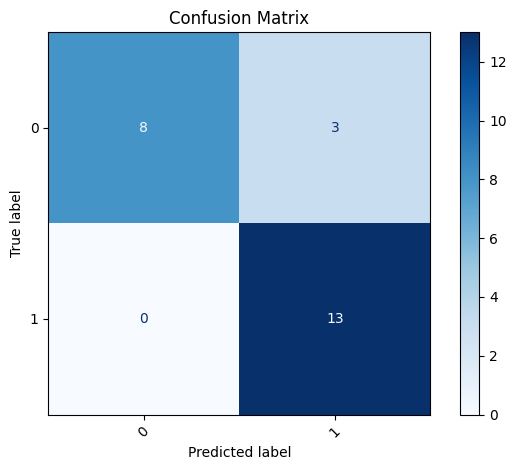

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true_best_classes, y_pred_best_classes)

plt.figure(figsize=(10, 8))
class_names = label_encoder.classes_
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

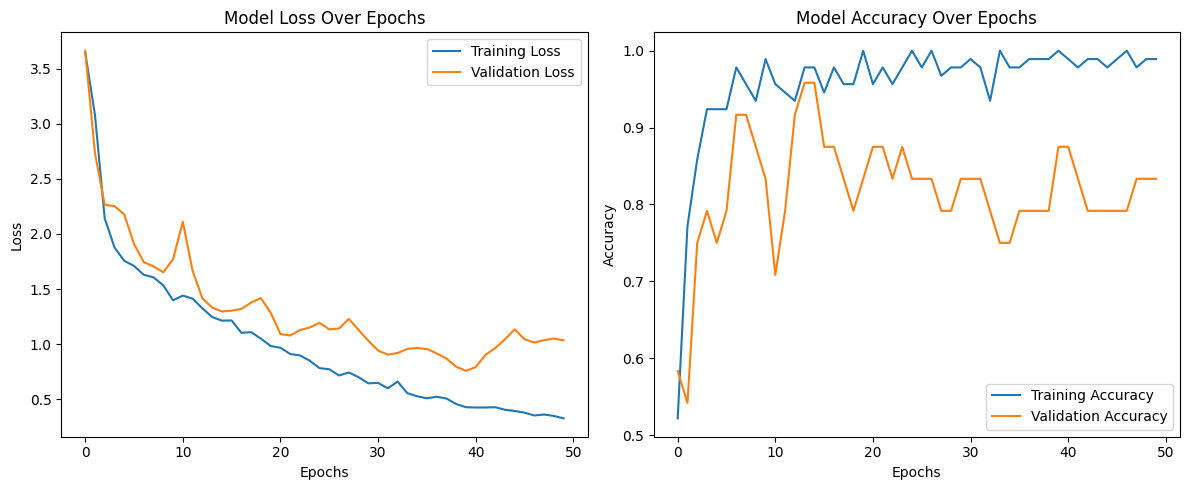

In [51]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

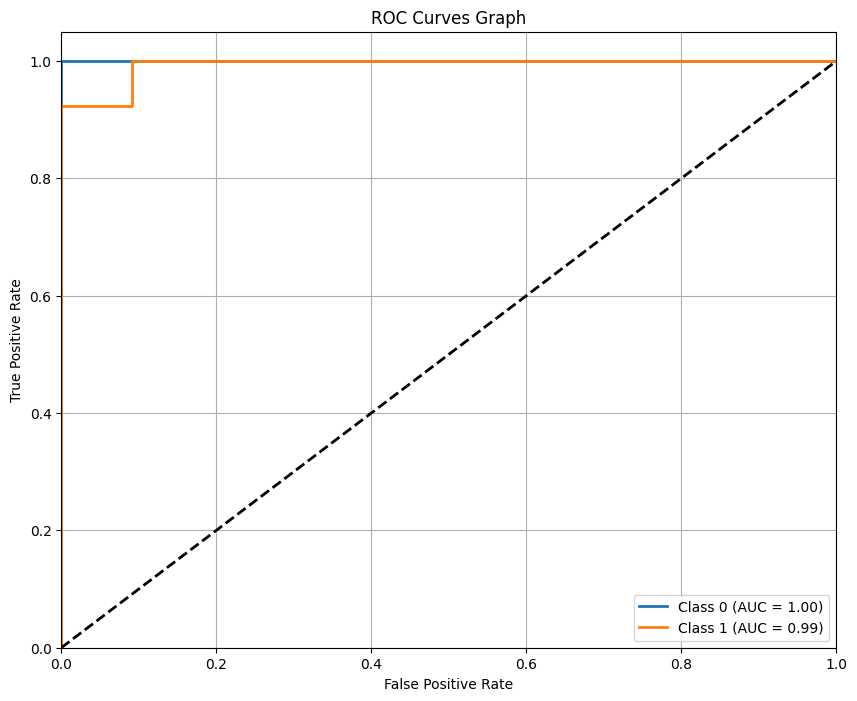

In [52]:
plt.figure(figsize=(10, 8))

n_classes = y_test.shape[1]

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_pred_best[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, 
                label=f'Class {label_encoder.inverse_transform([i])[0]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Graph')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

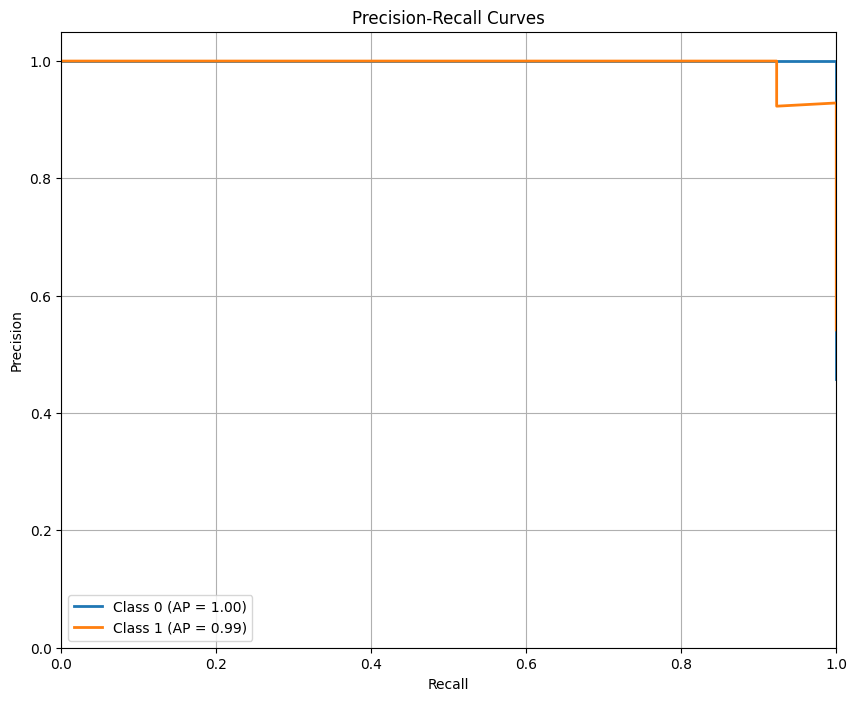

In [53]:
plt.figure(figsize=(10, 8))

n_classes = y_test.shape[1]

for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test[:, i], y_pred_best[:, i])
    avg_precision = average_precision_score(y_test[:, i], y_pred_best[:, i])
    plt.plot(recall, precision, lw=2,
                label=f'Class {label_encoder.inverse_transform([i])[0]} (AP = {avg_precision:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [54]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 398)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_2 (Reshape) │ (None, 398, 1)    │          0 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 398, 32)   │         64 │ reshape_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 398, 32)   │     16,800 │ dense_6[0][0],    │
│ (MultiHeadAttentio… │                   │            │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 398, 32)   │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 398, 32)   │          0 │ dropout_7[0][0],  │
│                     │                   │            │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 398, 32)   │         64 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 12736)     │          0 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 128)       │  1,630,336 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 128)       │          0 │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 2)         │        258 │ dropout_8[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 4,942,568 (18.85 MB)

 Trainable params: 1,647,522 (6.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,295,046 (12.57 MB)

In [55]:
best_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 398)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_3 (Reshape) │ (None, 398, 1)    │          0 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 398, 64)   │        128 │ reshape_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 398, 64)   │    132,672 │ dense_9[0][0],    │
│ (MultiHeadAttentio… │                   │            │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 398, 64)   │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 398, 64)   │          0 │ dropout_10[0][0], │
│                     │                   │            │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 398, 64)   │        128 │ add_3[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 25472)     │          0 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 64)        │  1,630,272 │ flatten_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 64)        │          0 │ dense_10[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 2)         │        130 │ dropout_11[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,289,992 (20.18 MB)

 Trainable params: 1,763,330 (6.73 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,526,662 (13.45 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━

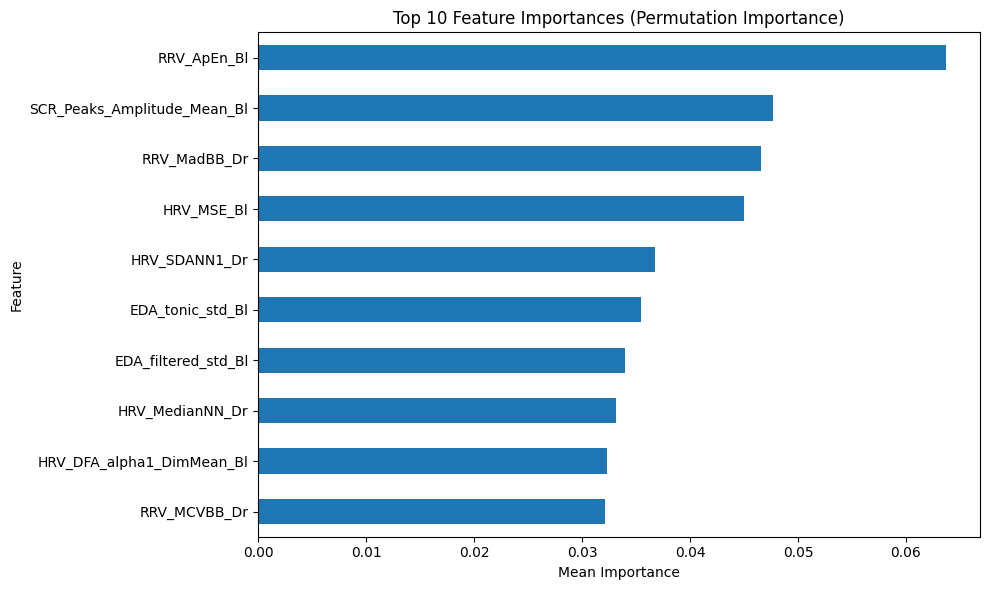

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd

scoring = ['r2', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error']

perm_importance = permutation_importance(
    best_model,
    x_test_norm,
    y_test,
    scoring=scoring,
    n_repeats=1,
    random_state=42
)

feature_names = data.drop(columns=['subject_id', 'label_sleep']).columns

feature_importances = pd.DataFrame({
    "Feature": feature_names,
    "Importance": perm_importance['r2']['importances_mean']
}).sort_values(by="Importance", ascending=False)

feature_importances.head(10).plot(
    kind="barh",
    x="Feature",
    y="Importance",
    legend=False,
    figsize=(10, 6)
)
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances (Permutation Importance)")
plt.xlabel("Mean Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
